In [39]:
## Import the required libraries
import pandas as pd
import pyforest
import matplotlib.pyplot as plt
import numpy as np
import pickle
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (accuracy_score, log_loss, classification_report)
from sklearn.model_selection import  cross_val_score, KFold
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.metrics import confusion_matrix
import missingno as msno
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings("ignore")

In [2]:
## load the dataset
df = pd.read_csv('train.csv', sep = ',')
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [3]:
## Explore the datatypes of each columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [4]:
df.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


In [5]:
## Explore the size of the data
df.shape
## The data has 74111 rows x 29 columns


(74111, 29)

In [6]:
## check if there are any null values in the dataframe
df.isnull().values.any()

True

In [7]:
## check for specific columns with null values
for column in df.columns:
    if df[column].isnull().sum() != 0: ## if the total null values in a column are not zero then return the column, the number of missing values and the data types
        print("\n{} :- {},  dtypes : {}".format(column,df[column].isnull().sum(),df[column].dtypes))
##bthere are 13 clumns with missing values


bathrooms :- 200,  dtypes : float64

first_review :- 15864,  dtypes : object

host_has_profile_pic :- 188,  dtypes : object

host_identity_verified :- 188,  dtypes : object

host_response_rate :- 18299,  dtypes : object

host_since :- 188,  dtypes : object

last_review :- 15827,  dtypes : object

neighbourhood :- 6872,  dtypes : object

review_scores_rating :- 16722,  dtypes : float64

thumbnail_url :- 8216,  dtypes : object

zipcode :- 966,  dtypes : object

bedrooms :- 91,  dtypes : float64

beds :- 131,  dtypes : float64


## Handling missing data & EDA

In [8]:
df['host_since']

0        2012-03-26
1        2017-06-19
2        2016-10-25
3        2015-04-19
4        2015-03-01
            ...    
74106    2013-03-24
74107    2016-05-03
74108    2012-01-05
74109    2017-09-17
74110    2012-11-26
Name: host_since, Length: 74111, dtype: object

<Axes: >

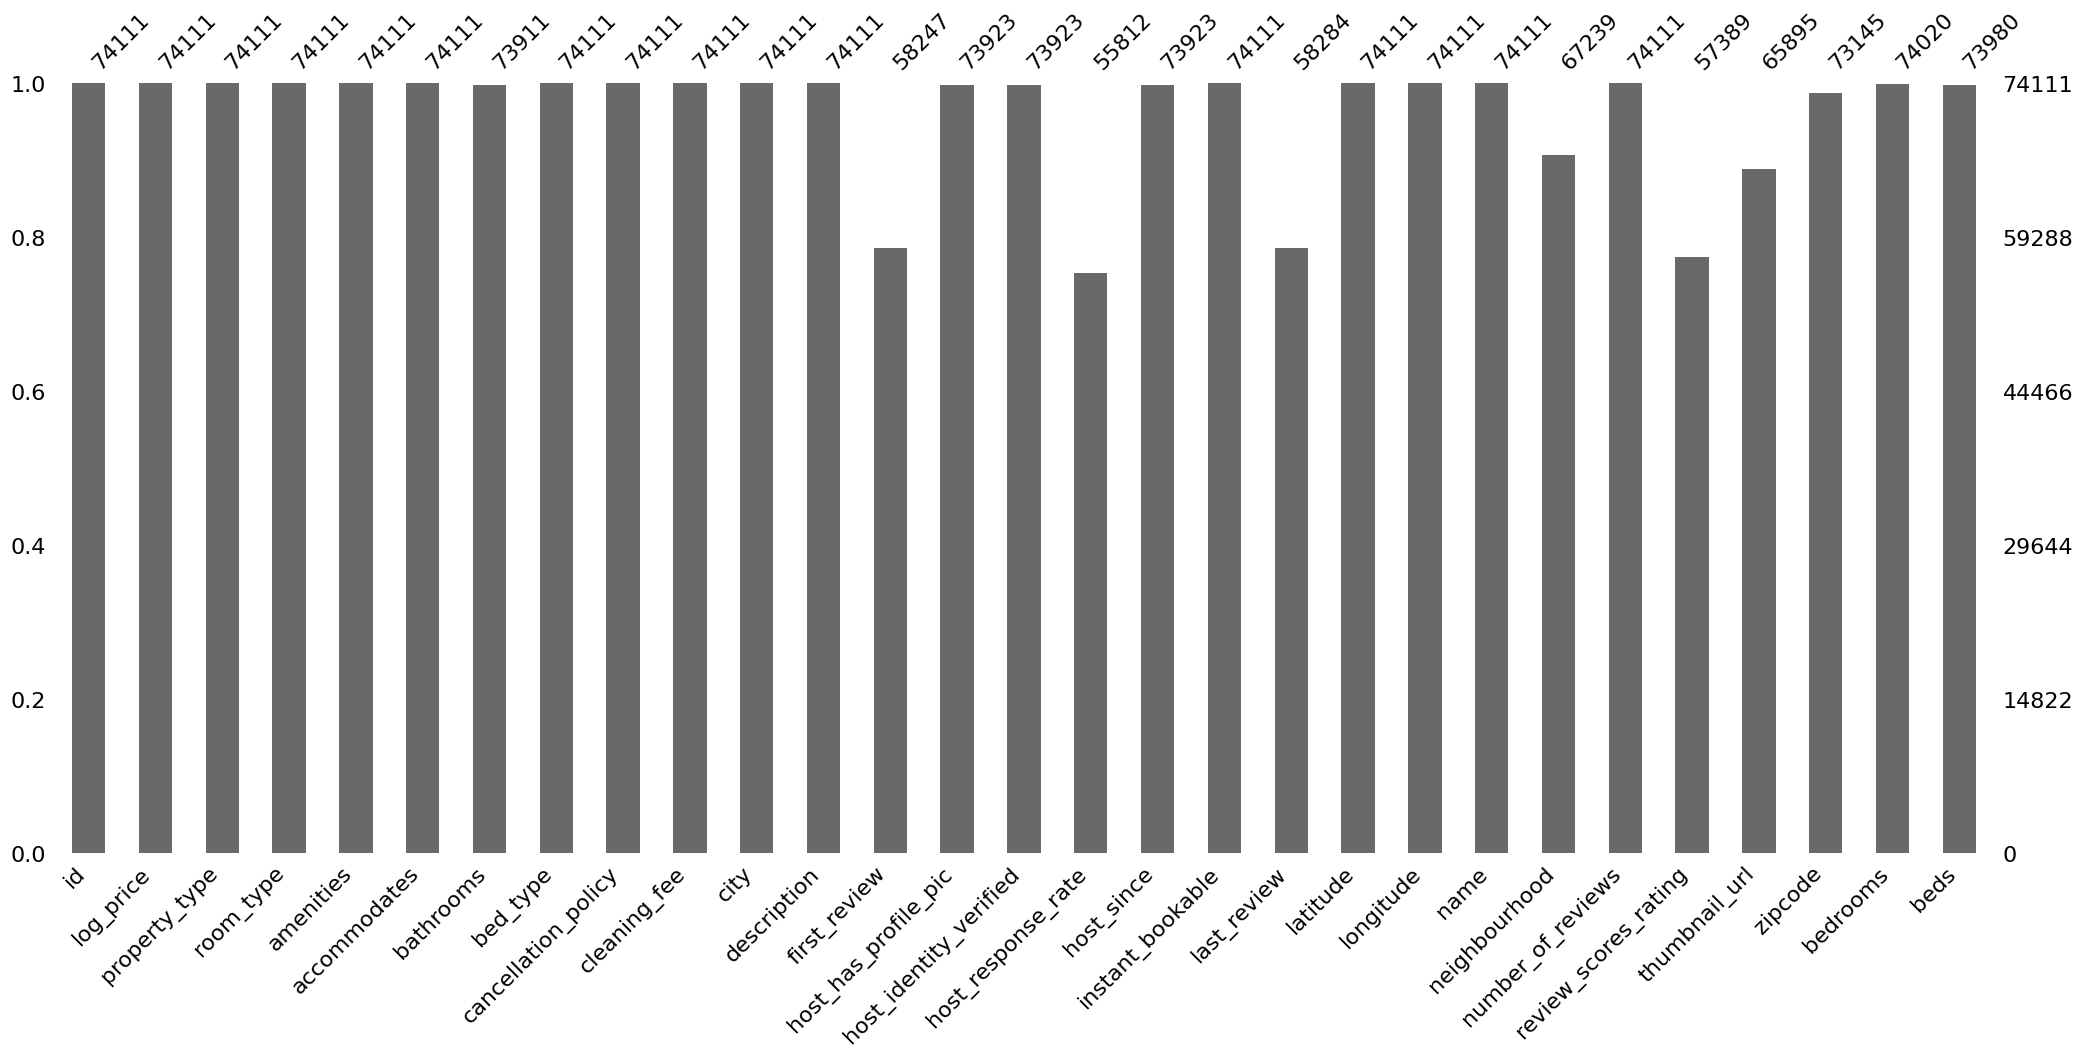

In [9]:
##Use median to impute numeric columns since median is not
#Visualizing missing values with Missingno 
#By analyzing how the data is distributed, we cna conclude that the values are missing at random
msno.bar(df)

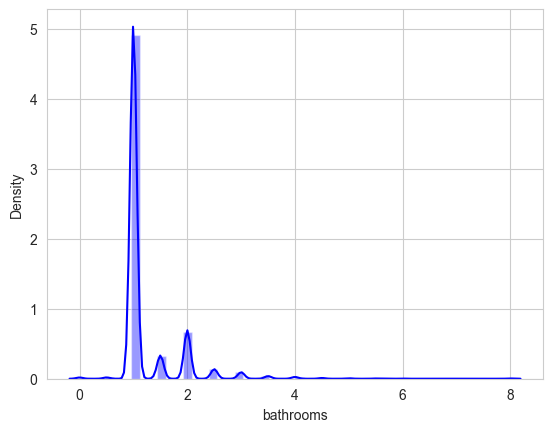

In [10]:
##Distplot represents the overall distribution of continuous data variables.
## displays the overall dispersion of real-time data parameters. 
sns.set_style('whitegrid')
sns.distplot(df["bathrooms"], color ='blue')
plt.show()

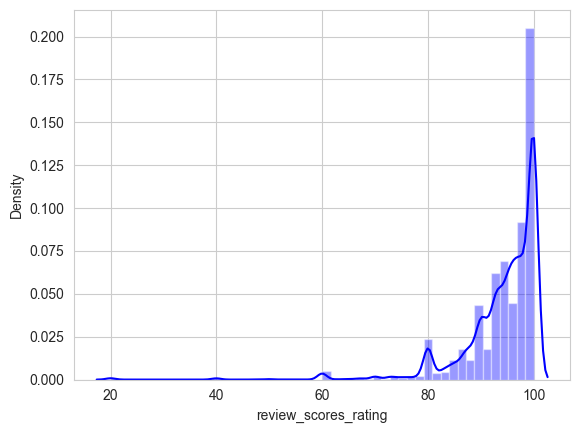

In [11]:
sns.set_style('whitegrid')
sns.distplot(df["review_scores_rating"], color ='blue')
plt.show()

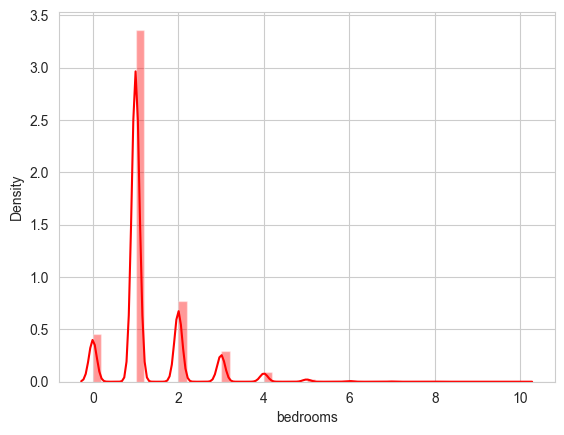

In [12]:
sns.set_style('whitegrid')
sns.distplot(df["bedrooms"], color ='red')
plt.show()

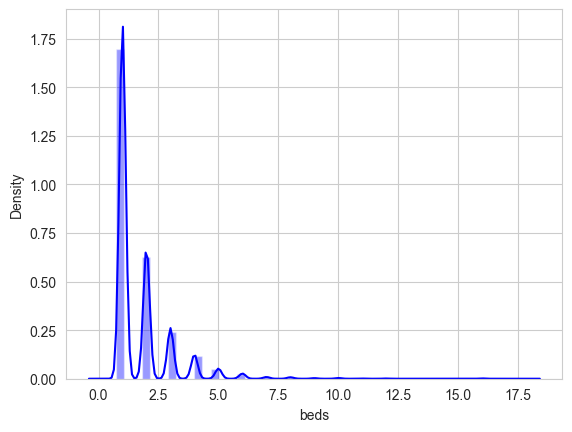

In [13]:
sns.set_style('whitegrid')
sns.distplot(df["beds"],color = 'blue')
plt.show()

### Fill na values for continuous varibles using median

In [14]:
df["bathrooms"] = df['bathrooms'].fillna(round(df["bathrooms"].median()))
df["bedrooms"] = df['bedrooms'].fillna(round(df["bedrooms"].median()))
df["beds"] = df['beds'].fillna(round(df["beds"].median()))
df["review_scores_rating"] = df['review_scores_rating'].fillna(round(df["beds"].median()))

## Fill na values for date columns using ‘ffill’ which stands for ‘forward fill’ and will propagate last valid observation forward.

In [15]:

df['last_review'] = df['last_review'].fillna(method='ffill')
df['first_review'] = df['first_review'].fillna(method='ffill')
df['host_since'] = df['host_since'].fillna(method='ffill')

In [16]:

percent_missing_hostresponse = df['host_response_rate'].isnull().sum() * 100 / len(df)
percent_missing_hostresponse


24.691341366328885

In [17]:
## fill na values for some categorical values using most common values
df["host_has_profile_pic"] = df['host_has_profile_pic'].fillna(df['host_has_profile_pic'].mode())
df['host_identity_verified'] = df['host_identity_verified'].fillna(df["host_identity_verified"].mode())

## EDA

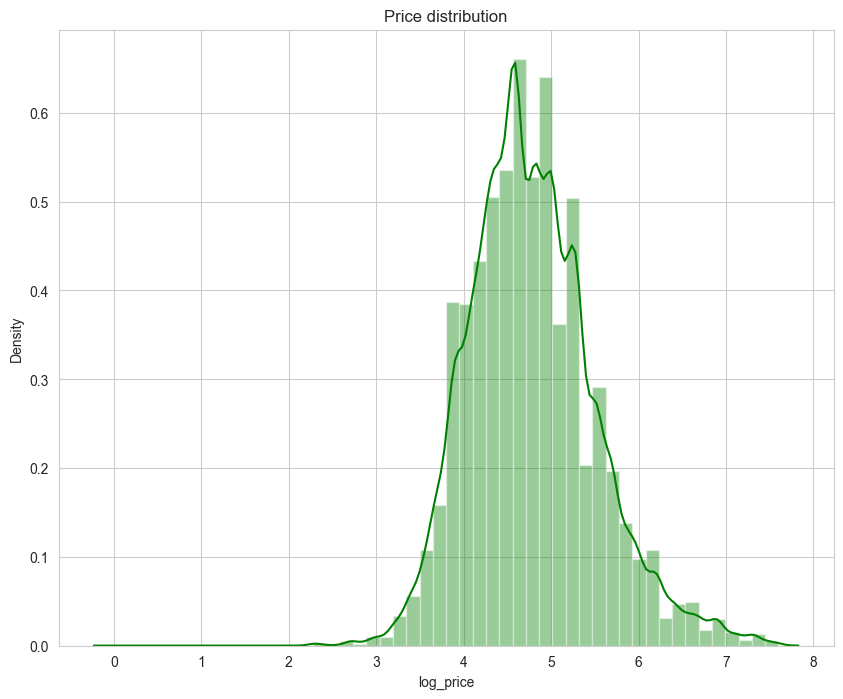

In [18]:
## check price distribution
sns.set_style('whitegrid')
plt.figure(figsize = (10, 8))
sns.distplot(df["log_price"], color='green')
plt.title('Price distribution')
plt.show()

In [19]:
## Assuming no houses can be free we need to drop those observations with price =0
df['log_price'].describe()

count    74111.000000
mean         4.782069
std          0.717394
min          0.000000
25%          4.317488
50%          4.709530
75%          5.220356
max          7.600402
Name: log_price, dtype: float64

In [20]:
df['log_price'] = df['log_price'][(df['log_price'] != 0)] # drop zeros

## Check how variables are correlated with each other


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74110 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               74111 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            74111 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

<Axes: >

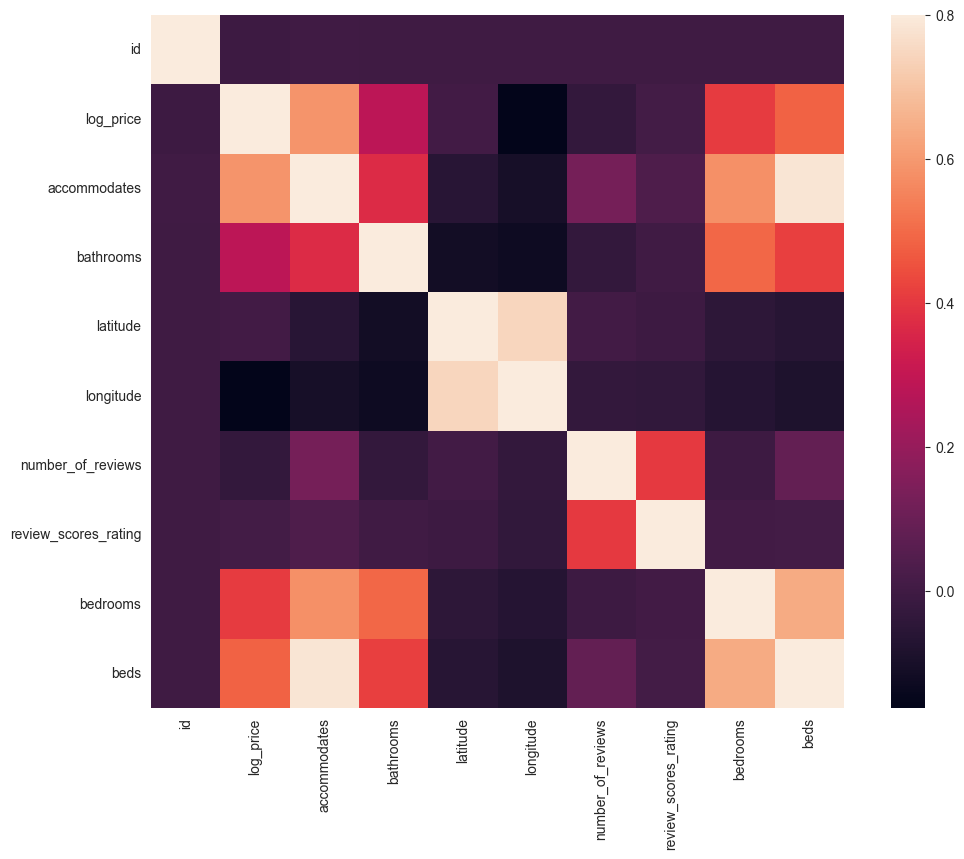

In [22]:
#correlation matrix
# Select only numeric data and plot a correlation matrix
## we observe that the beds are more correlated to the logprice
numerics = ['int64','float64']
data = df.select_dtypes(include=numerics)
corrmat = data.corr(method = 'spearman')
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

In [23]:
df.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [24]:
## we can also observe which words are most porpular by visualizing the categorizal features
amenities = ' '.join(df['amenities'].tolist())
amenities_wordcloud = WordCloud(background_color='white', max_font_size=50).generate(amenities)

description = ' '.join(df['description'].tolist())
description_wordcloud = WordCloud(background_color='white', max_font_size=50).generate(description)

name = ' '.join(df['name'].tolist())
name_wordcloud = WordCloud(background_color='white', max_font_size=50).generate(name)

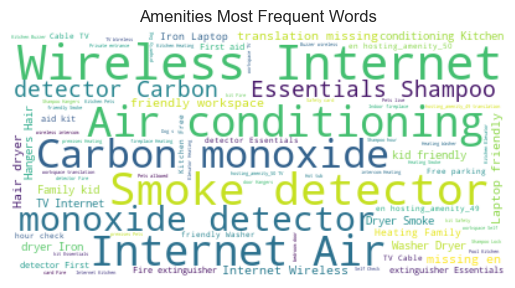

In [25]:
## frequent words that appear in amenities. 
plt.imshow(amenities_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Amenities Most Frequent Words')
plt.show()

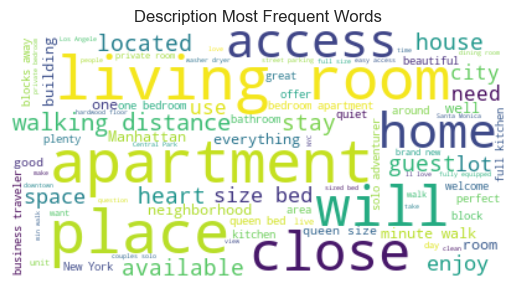

In [26]:
plt.imshow(description_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Description Most Frequent Words')
plt.show()

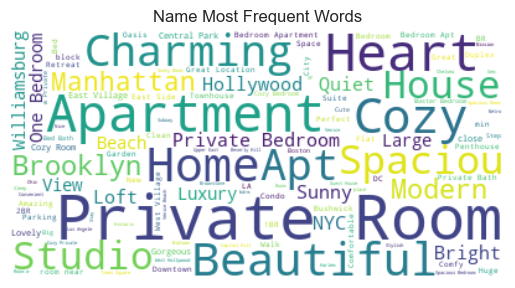

In [27]:
plt.imshow(name_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Name Most Frequent Words')
plt.show()

The most frequent words in all the features above include; room, home, appartment

### Visualize most popular cities and Neighbourhoods

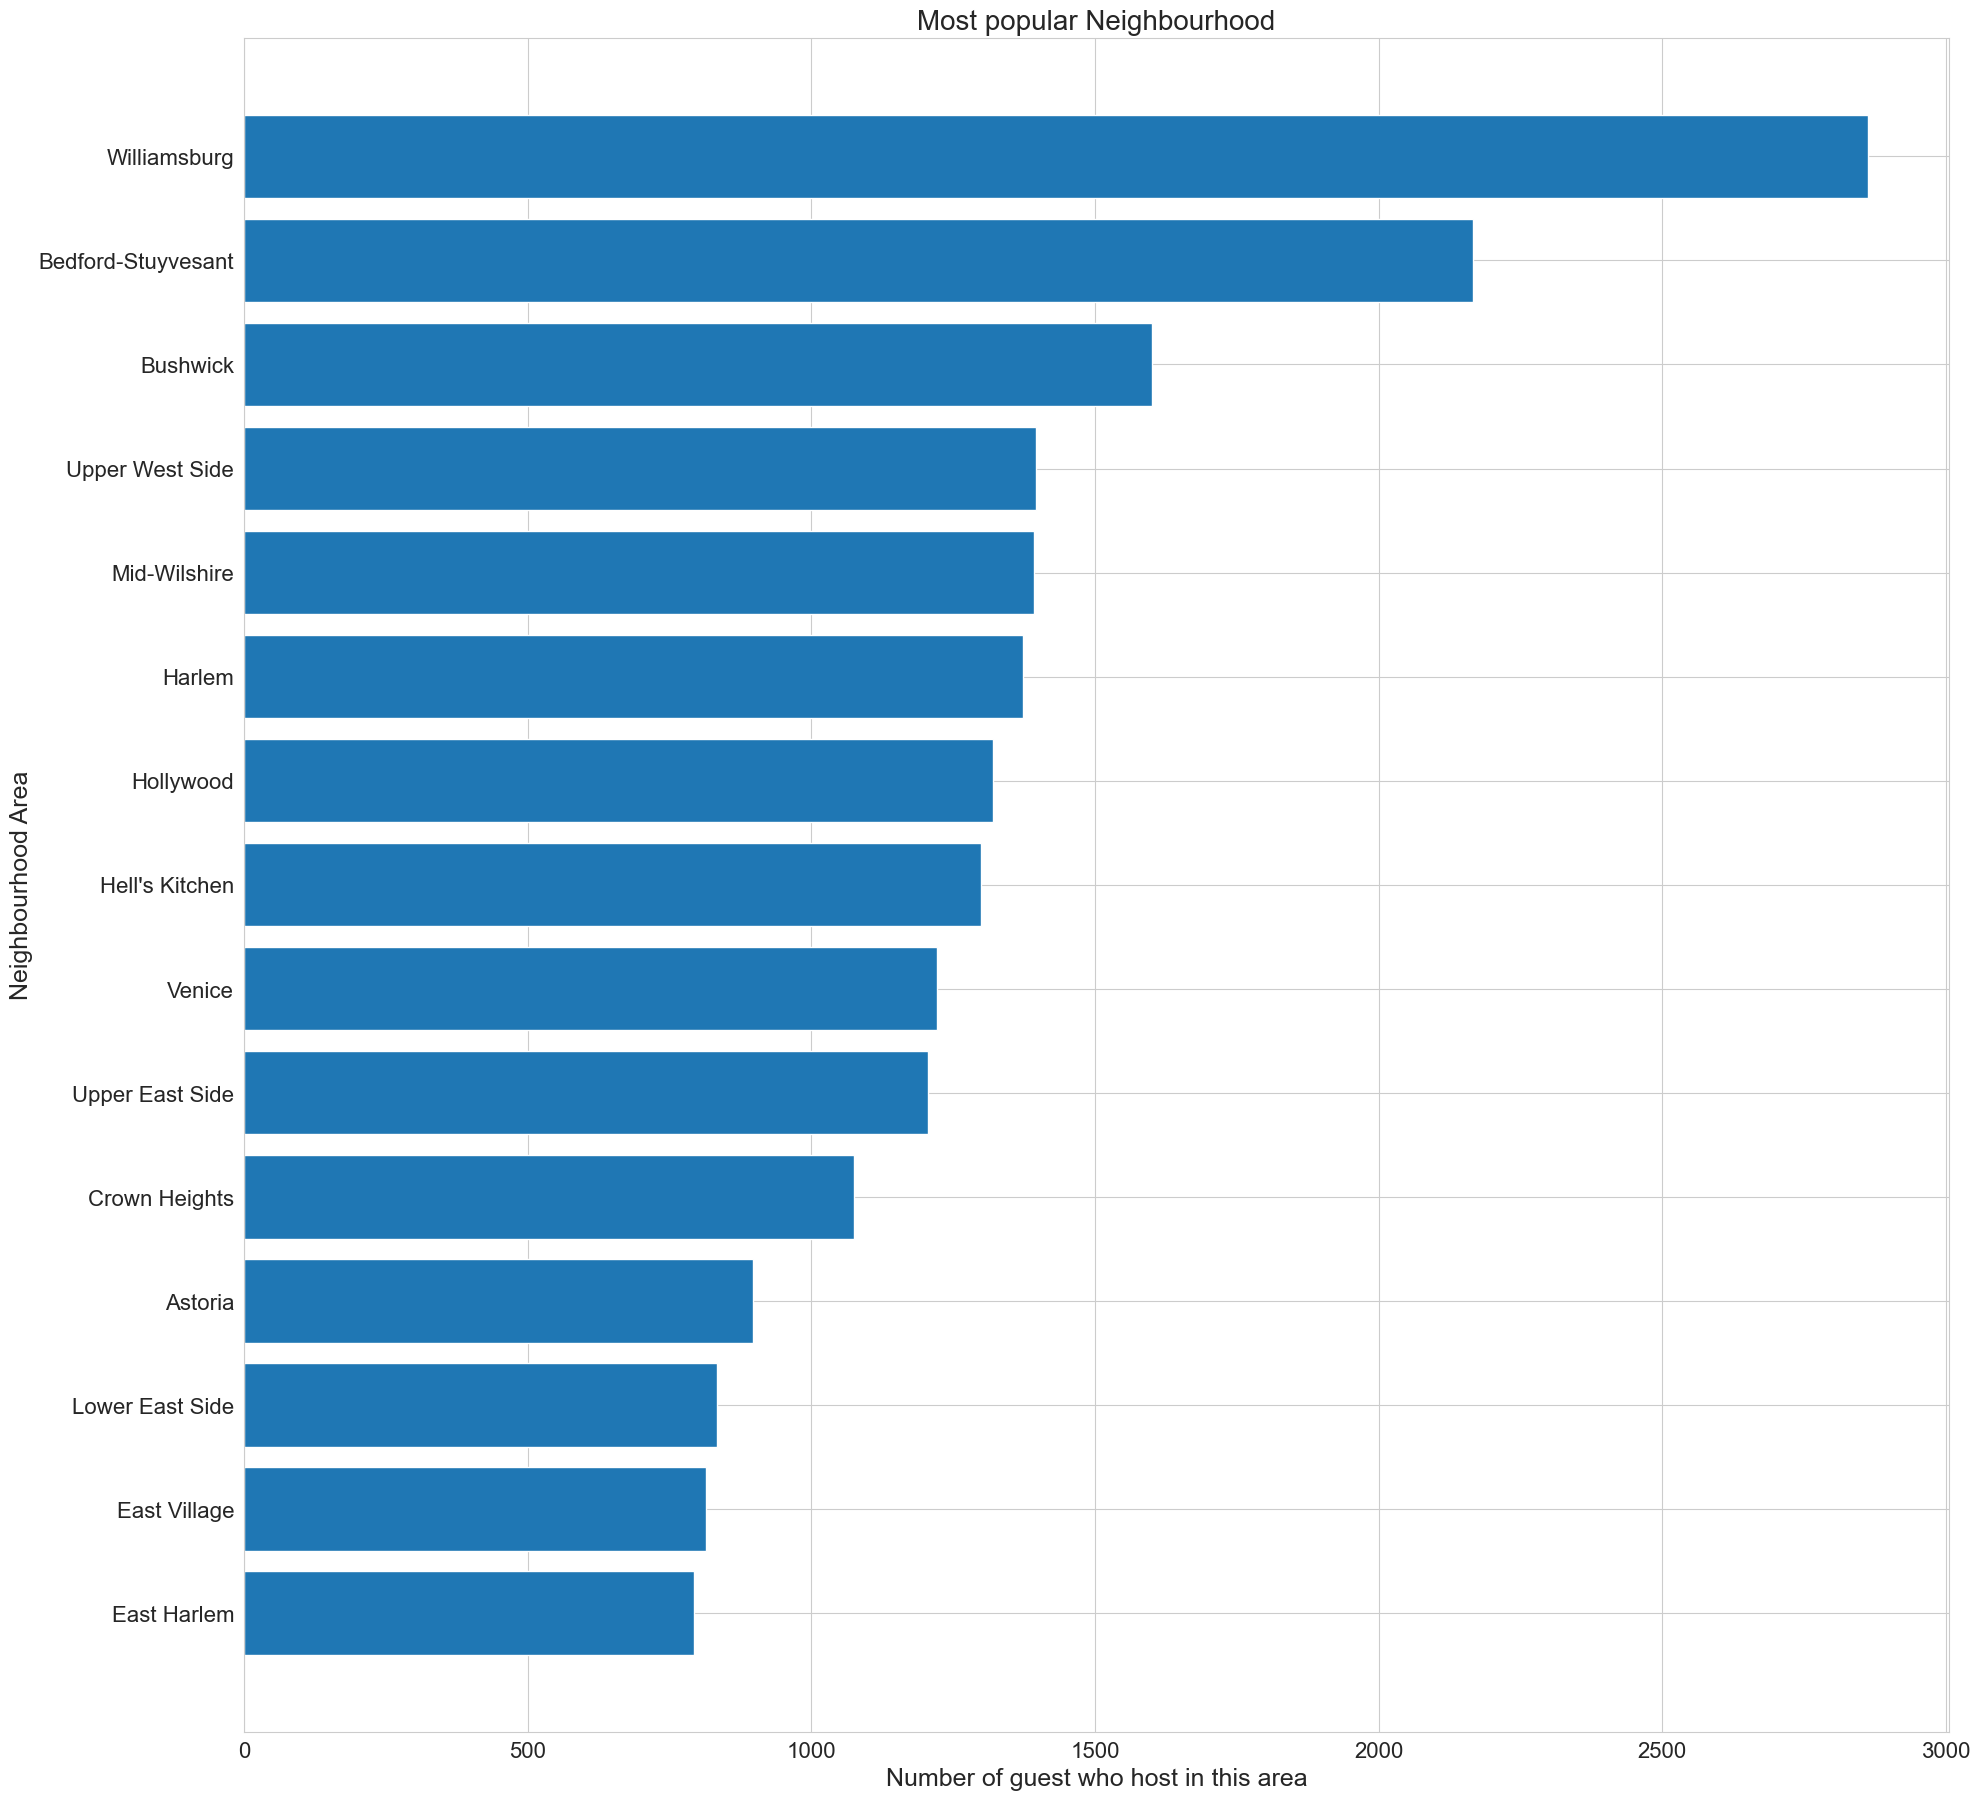

In [28]:
Top_most = df.neighbourhood.value_counts()[:15]
plt.figure(figsize=(22,22))
x = list(Top_most.index)
y = list(Top_most.values)
x.reverse()
y.reverse()
plt.title("Most popular Neighbourhood",  fontsize=20)
plt.ylabel("Neighbourhood Area",fontsize=18)
plt.xlabel("Number of guest who host in this area", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.barh(x,y)
plt.show()

## Prepare data for Model prediction

In [29]:
df.dropna(inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44249 entries, 1 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      44249 non-null  int64  
 1   log_price               44249 non-null  float64
 2   property_type           44249 non-null  object 
 3   room_type               44249 non-null  object 
 4   amenities               44249 non-null  object 
 5   accommodates            44249 non-null  int64  
 6   bathrooms               44249 non-null  float64
 7   bed_type                44249 non-null  object 
 8   cancellation_policy     44249 non-null  object 
 9   cleaning_fee            44249 non-null  bool   
 10  city                    44249 non-null  object 
 11  description             44249 non-null  object 
 12  first_review            44249 non-null  object 
 13  host_has_profile_pic    44249 non-null  object 
 14  host_identity_verified  44249 non-null  obj

In [31]:
alldata = df.copy()
categorical = []
for col in alldata.columns:
    if alldata[col].dtypes == 'object':
        categorical.append(col)
print(categorical)

['property_type', 'room_type', 'amenities', 'bed_type', 'cancellation_policy', 'city', 'description', 'first_review', 'host_has_profile_pic', 'host_identity_verified', 'host_response_rate', 'host_since', 'instant_bookable', 'last_review', 'name', 'neighbourhood', 'thumbnail_url', 'zipcode']


In [32]:
# Store the numerical columns in a list numerical
numerical = alldata.columns.difference(categorical)
print(numerical)

Index(['accommodates', 'bathrooms', 'bedrooms', 'beds', 'cleaning_fee', 'id',
       'latitude', 'log_price', 'longitude', 'number_of_reviews',
       'review_scores_rating'],
      dtype='object')


In [34]:
le = LabelEncoder()
for col in categorical:
    alldata[col] = le.fit_transform(alldata[col])

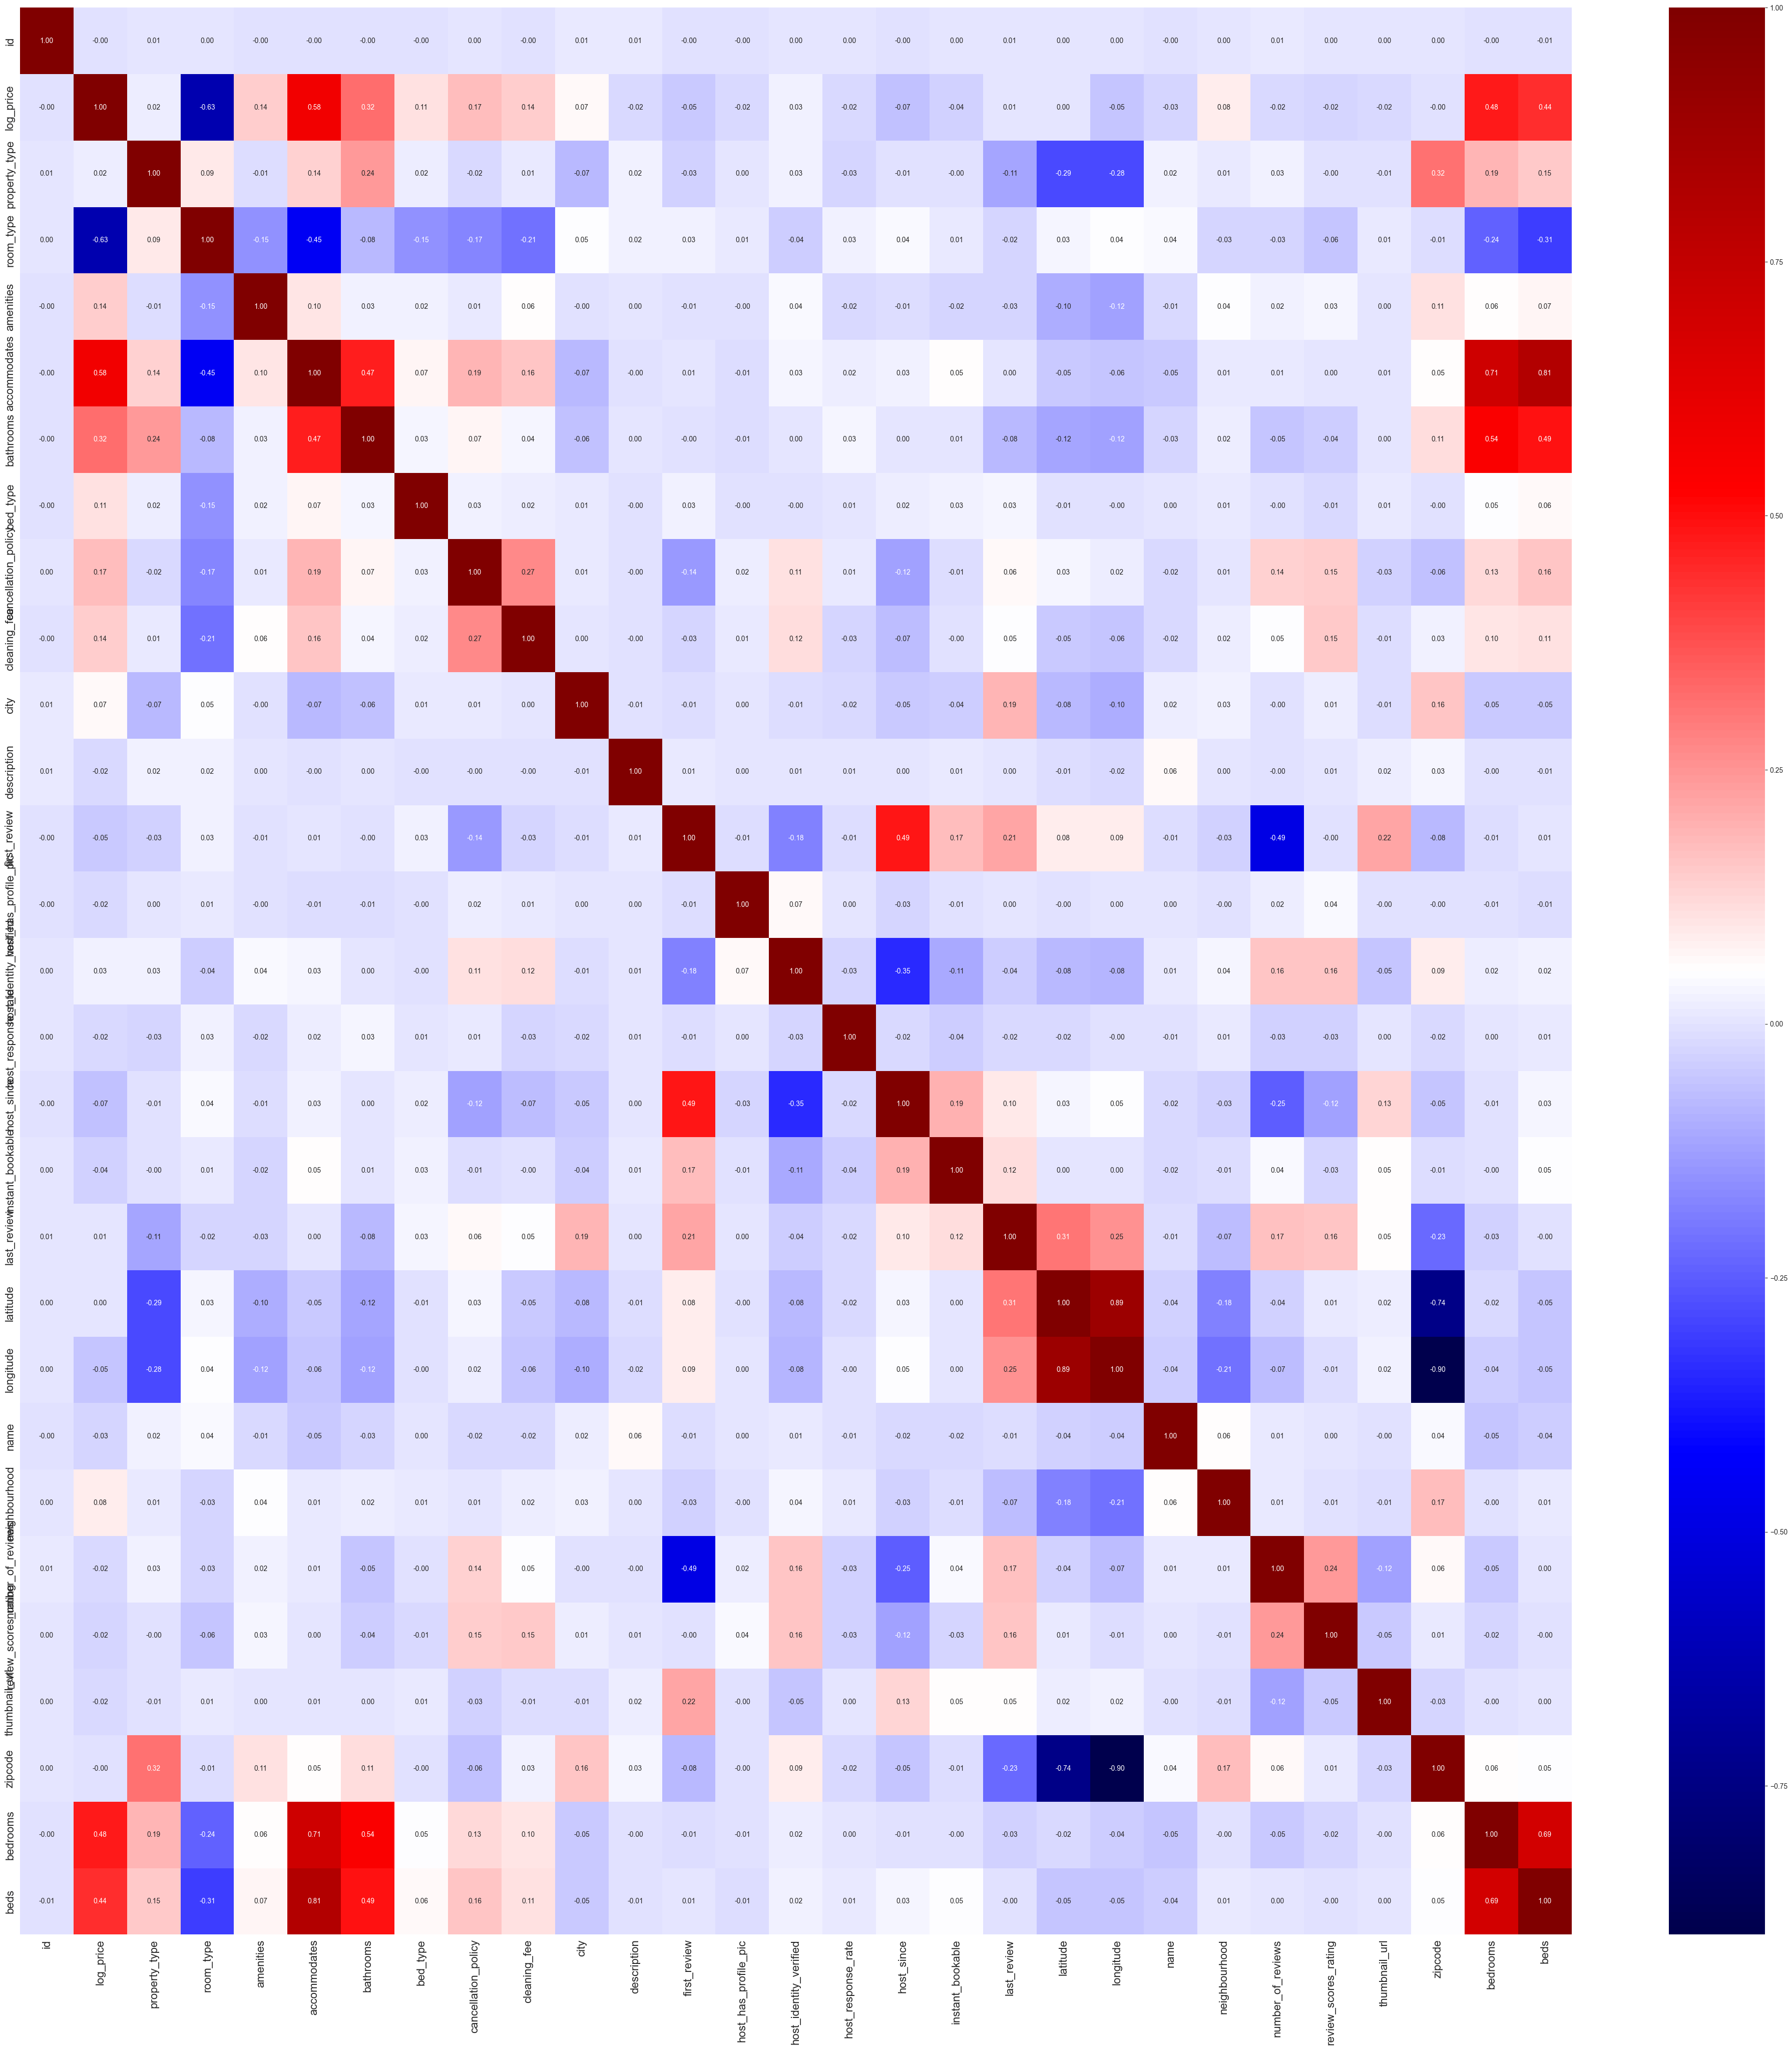

In [36]:
## Plot the correlation matrix with all the numeric variables
plt.figure(figsize = (50,50))
sns.heatmap(alldata.corr(), annot=True, fmt=".2f", cmap="seismic")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [37]:
## Separate your data to explanatory and response variables 
X = alldata.drop(['log_price','id', "description","first_review","host_since","last_review","neighbourhood","thumbnail_url", "zipcode"], axis = 1)  ## drop any columns that have little correlation to the response
y = alldata[['log_price']]

In [38]:
# Splitting the dataset into the Training set and Test set - test set is 20% of the whole data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Train the model using Random Forest

In [40]:
seed = 0   # We set our random seed to zero for reproducibility

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [42]:
y_pred_rf = rf.predict(X_test)

In [43]:
mae_rf = metrics.mean_absolute_error(y_test, y_pred_rf)
mse_rf = metrics.mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf))
r2_rf = metrics.r2_score(y_test, y_pred_rf)


print('\nMean Absolute Error of Random Forest Regressor     : ', mae_rf)
print('\nMean Squarred Error of Random Forest Regressor     : ', mse_rf)
print('\nRoot Mean Squarred Error of Random Forest Regressor: ', rmse_rf)
print('\nR2 Score of Random Forest Regressor                : ', r2_rf)


Mean Absolute Error of Random Forest Regressor     :  0.25178310825326494

Mean Squarred Error of Random Forest Regressor     :  0.11894873659747308

Root Mean Squarred Error of Random Forest Regressor:  0.3448894556194391

R2 Score of Random Forest Regressor                :  0.7439321802105369


## Train the model using Linear Regression Model

In [46]:
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [47]:
y_pred_lr = lr.predict(X_test)

In [48]:
mae_lr = metrics.mean_absolute_error(y_test, y_pred_lr)
mse_lr = metrics.mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr))
r2_lr = metrics.r2_score(y_test, y_pred_lr)


print('\nMean Absolute Error of Linear Regression     : ', mae_lr)
print('\nMean Squarred Error of Linear Regression     : ', mse_lr)
print('\nRoot Mean Squarred Error of Linear Regression: ', rmse_lr)
print('\nR2 Score of Linear Regression                : ', r2_lr)


Mean Absolute Error of Linear Regression     :  0.3418447279262059

Mean Squarred Error of Linear Regression     :  0.19662925731446537

Root Mean Squarred Error of Linear Regression:  0.4434289766292516

R2 Score of Linear Regression                :  0.5767048337997553


In [49]:
r2_list = {"Linear Regression": r2_lr,
          "Random Forest": r2_rf}
mae_list = {"Linear Regression": mae_lr,
          "Random Forest": mae_rf }
mse_list = {"Linear Regression": mse_lr,
          "Random Forest": mse_rf}
rmse_list = {"Linear Regression": rmse_lr,
          "Random Forest": rmse_rf}

In [50]:
r2 =  pd.DataFrame.from_dict(r2_list, orient = 'index', columns = ["R2 SCORE"])
mae =  pd.DataFrame.from_dict(mae_list, orient = 'index', columns = ["MEAN ABSOLUTE ERROR"])
mse =  pd.DataFrame.from_dict(mse_list, orient = 'index', columns = ["MEAN SQUARRED ERROR"])
rmse =  pd.DataFrame.from_dict(rmse_list, orient = 'index', columns = ["ROOT MEAN SQUARRED ERROR"])

In [51]:
measures = pd.concat([r2 , mae, mse, rmse], axis = 1)
measures

,R2 SCORE,MEAN ABSOLUTE ERROR,MEAN SQUARRED ERROR,ROOT MEAN SQUARRED ERROR
Linear Regression,0.576705,0.341845,0.196629,0.443429
Random Forest,0.743932,0.251783,0.118949,0.344889


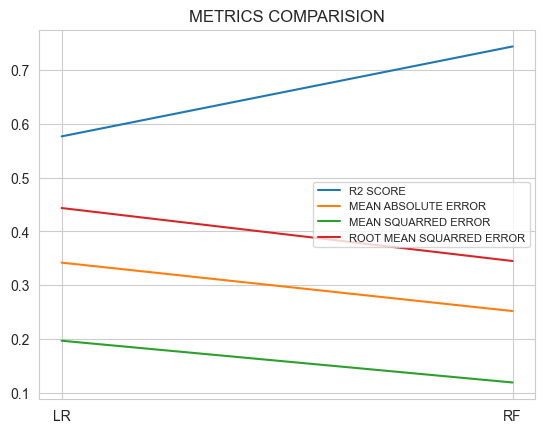

In [54]:
all_models = ['LR','RF']
plt.plot(all_models,r2)
plt.plot(all_models,mae)
plt.plot(all_models,mse)
plt.plot(all_models,rmse)
legend = ["R2 SCORE", "MEAN ABSOLUTE ERROR", "MEAN SQUARRED ERROR", "ROOT MEAN SQUARRED ERROR"]

plt.title("METRICS COMPARISION")
plt.legend(legend, loc= 'right', fontsize=8)
plt.show()

## Comparison Between Random Forest and Linear Regression

- Linear regression (LR) model that explains the relationship between a response variable (logprice) and explanatory variables. It assumes there is a linear relationship between the response and explanatory variables. In real life, the relationship between the response variable and explanatory variables may not be linear.

- Random forest (RF) for regression is a supervised learning algorithm and bagging technique that uses an ensemble learning method for regression. RF is a treebased model that is more robust and its able to explain a more complex relationship between the response and explanatory variables.

- Comparing the results above, we see that RF performs better than LR, this is in relation to the metrics as displayed above. The R2 value for RF is greater than the R2 value for LR, meaning that 74% of the variance in the response variable can be explained by the explanatory variables in RF model compared to only 57% explained variance in LR.
This shows that the RF model fits the data much better than the LR model.

- Comparing the other metrics for performance evaluation, we observe that RF model has less errors accross compared to LR. These errors show the difference between the actual proce values and predicted prices. The lower value of MAE, MSE, and RMSE then higher accuracy of a regression model, comparing teh values in the table above, RF has lower error values compared to LR model. For example, RF model has an RMSE value of 0.34 while LR model has an RMSE value of 0.44, meaning the RF model can predict the value of a response variable in absolute terms, with lesser error compared to LR model.

In Conclusion, RF model perfroms better than LR model for prediction of Airbnb prices after comparing the performance metrics.


